In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
train = pd.read_csv("Train-1542865627584.csv")
train_beneficiarydata =pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
train_inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
train_outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [4]:
train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [5]:
train_beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [6]:
train_alldata=pd.merge(train_outpatientdata,train_inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [7]:
train_alldata=pd.merge(train_alldata,train_beneficiarydata,on="BeneID")

In [8]:
train_alldata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,...,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,...,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,...,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,...,1,2,1,1,2,2,4000,1068,0,0


In [9]:
df=pd.merge(train_alldata,train,on='Provider')

In [10]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [11]:
df = df.drop(['BeneID'],axis=1)

In [12]:
df.isna().sum()

ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                

In [13]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [14]:
df

,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,...,2,2,2,2,2,0,0,30,50,Yes
1,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,...,1,1,1,1,2,0,0,1810,760,Yes
3,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,...,1,1,2,1,2,2200,2136,30,100,No
558207,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,...,1,2,2,2,2,4000,1068,0,0,No
558208,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,...,2,1,2,2,2,8000,1068,0,0,No
558209,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,...,1,1,2,2,2,5000,1068,0,0,No


In [15]:
df.isna().sum()

ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov               

In [16]:
df2 = df
df = pd.DataFrame()


In [17]:
df2.isnull().sum()

ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov               

In [18]:
df

""


In [19]:
df['claim']=df2['InscClaimAmtReimbursed']
#Amt of money reimbursed by the patient

In [20]:
startdate= pd.to_datetime( df2["ClaimStartDt"] )
enddate= pd.to_datetime( df2["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p
#here p is the period of insurance claim 

In [21]:
startdate = pd.to_datetime(df2['AdmissionDt'])
enddate = pd.to_datetime(df2['DischargeDt'])
pe = (enddate - startdate).dt.days
df['Hperiod'] = pe
#Here pe refers to the Hospital period which was spent by the patient

In [22]:
df

,claim,period,Hperiod
0,30,0,NaN
1,40,0,NaN
2,200,0,NaN
3,20,0,NaN
4,40,0,NaN
...,...,...,...
558206,0,5,5.0
558207,4000,3,3.0
558208,8000,8,8.0
558209,5000,3,3.0


In [23]:
def compare_physician(row):
    a=row["AttendingPhysician"]==row["OperatingPhysician"] ##comparing if attending phys is same as operating phys
    b=row["OperatingPhysician"]==row["OtherPhysician"] #comparing if other phys is same as operating phys
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if a==True and b==True:# atten = oper = other
        return 0
    elif a==True and b==False:# atten = oper != other
        return 1
    elif a==False and b==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_stats=df2.apply(compare_physician,axis=1)

In [24]:
df['phy_stats']=phy_stats

In [25]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

df2['PotentialFraud']= label_encoder.fit_transform(df2['PotentialFraud'])
  

In [26]:
df2['PotentialFraud'].values

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
df

,claim,period,Hperiod,phy_stats
0,30,0,NaN,3
1,40,0,NaN,3
2,200,0,NaN,3
3,20,0,NaN,3
4,40,0,NaN,3
...,...,...,...,...
558206,0,5,5.0,3
558207,4000,3,3.0,3
558208,8000,8,8.0,3
558209,5000,3,3.0,3


In [28]:
df2

,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,...,2,2,2,2,2,0,0,30,50,1
1,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,...,1,1,1,1,2,0,0,1810,760,1
2,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,...,1,1,1,1,2,0,0,1810,760,1
3,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,...,1,1,1,1,2,0,0,1810,760,1
4,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,...,1,1,1,1,2,0,0,1810,760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,...,1,1,2,1,2,2200,2136,30,100,0
558207,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,...,1,2,2,2,2,4000,1068,0,0,0
558208,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,...,2,1,2,2,2,8000,1068,0,0,0
558209,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,...,1,1,2,2,2,5000,1068,0,0,0


In [29]:
# from sklearn.preprocessing import MinMaxScaler

In [223]:
# scaler=MinMaxScaler()

In [224]:
# scaled_data=scaler.fit_transform(df)

In [227]:
# scaled_data

array([[2.40000000e-04, 0.00000000e+00,            nan, 1.00000000e+00],
       [3.20000000e-04, 0.00000000e+00,            nan, 1.00000000e+00],
       [1.60000000e-03, 0.00000000e+00,            nan, 1.00000000e+00],
       ...,
       [6.40000000e-02, 2.22222222e-01, 2.28571429e-01, 1.00000000e+00],
       [4.00000000e-02, 8.33333333e-02, 8.57142857e-02, 1.00000000e+00],
       [2.40000000e-02, 2.22222222e-01, 2.28571429e-01, 1.00000000e+00]])

In [228]:
# df['claim'].describe()

count    558211.000000
mean        997.012133
std        3821.534891
min           0.000000
25%          40.000000
50%          80.000000
75%         300.000000
max      125000.000000
Name: claim, dtype: float64

In [167]:
# df['claim_new']=df['claim']/100000

In [165]:
# df['claim']

0           30
1           40
2          200
3           20
4           40
          ... 
558206       0
558207    4000
558208    8000
558209    5000
558210    3000
Name: claim, Length: 558211, dtype: int64

In [168]:
# df['claim_new']

0         0.0003
1         0.0004
2         0.0020
3         0.0002
4         0.0004
           ...  
558206    0.0000
558207    0.0400
558208    0.0800
558209    0.0500
558210    0.0300
Name: claim_new, Length: 558211, dtype: float64

In [169]:
# df=df.drop('claim',axis=1)

In [170]:
# df

,period,Hperiod,phy_stats,claim_new
0,0,NaN,3,0.0003
1,0,NaN,3,0.0004
2,0,NaN,3,0.0020
3,0,NaN,3,0.0002
4,0,NaN,3,0.0004
...,...,...,...,...
558206,5,5.0,3,0.0000
558207,3,3.0,3,0.0400
558208,8,8.0,3,0.0800
558209,3,3.0,3,0.0500


In [30]:
df["RenalDiseaseIndicator"]=df2["RenalDiseaseIndicator"].replace({"Y":1})

In [31]:
birthdate=pd.to_datetime(df2["DOB"])
enddate=pd.to_datetime(df2["DOD"])

# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period

In [32]:
df.isnull().sum()

claim                         0
period                        0
Hperiod                  517737
phy_stats                     0
RenalDiseaseIndicator         0
age                           0
dtype: int64

In [33]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','PotentialFraud']

In [34]:
df['Provider']= label_encoder.fit_transform(df2['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [35]:
for i in columns:
    df[i]=df2[i]

In [36]:
df.shape

(558211, 21)

In [39]:
df.columns


Index(['claim', 'period', 'Hperiod', 'phy_stats', 'RenalDiseaseIndicator',
       'age', 'Provider', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_stroke',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
       'DeductibleAmtPaid', 'PotentialFraud'],
      dtype='object')

In [40]:
df

,claim,period,Hperiod,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,NaN,3,0,75,4004,12,12,2,...,2,2,2,2,2,2,30,50,0.0,1
1,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,5.0,3,0,68,2013,12,12,2,...,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3.0,3,1,68,567,12,12,1,...,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,8.0,3,0,74,2810,12,12,2,...,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3.0,3,0,84,185,12,0,1,...,2,2,2,1,1,2,0,0,1068.0,0


In [238]:
# scaler=MinMaxScaler()

In [239]:
# scaled_dataa=scaler.fit_transform(df)

In [241]:
# scaled_dataa.shape


(558211, 21)

In [179]:
# df['OPAnnualReimbursementAmt'].describe()


count    558211.000000
mean       2278.225348
std        3881.846386
min         -70.000000
25%         460.000000
50%        1170.000000
75%        2590.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

In [180]:
# df=df[df['OPAnnualReimbursementAmt']>0]

In [287]:
df.shape

(558211, 21)

In [243]:
df

,claim,period,Hperiod,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,NaN,3,0,75,4004,12,12,2,...,2,2,2,2,2,2,30,50,0.0,1
1,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,5.0,3,0,68,2013,12,12,2,...,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3.0,3,1,68,567,12,12,1,...,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,8.0,3,0,74,2810,12,12,2,...,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3.0,3,0,84,185,12,0,1,...,2,2,2,1,1,2,0,0,1068.0,0


In [183]:
# df['OPAnnualReimbursementAmt']

0           30
1         1810
2         1810
3         1810
4         1810
          ... 
558198      90
558199     690
558201    2150
558202    2150
558206      30
Name: OPAnnualReimbursementAmt, Length: 553277, dtype: int64

In [184]:
# df['OPAnnualReimbursementAmt']=df['OPAnnualReimbursementAmt']/100000

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_3340\1968241623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OPAnnualReimbursementAmt']=df['OPAnnualReimbursementAmt']/100000


In [186]:
# df['OPAnnualReimbursementAmt'].describe()

count    553277.000000
mean          0.022985
std           0.038931
min           0.000100
25%           0.004800
50%           0.011900
75%           0.026100
max           1.029600
Name: OPAnnualReimbursementAmt, dtype: float64

In [187]:
# df['OPAnnualDeductibleAmt']

0          50
1         760
2         760
3         760
4         760
         ... 
558198      0
558199    130
558201    570
558202    570
558206    100
Name: OPAnnualDeductibleAmt, Length: 553277, dtype: int64

In [189]:
# df['OPAnnualDeductibleAmt'].describe()

count    553277.000000
mean          0.006553
std           0.010047
min           0.000000
25%           0.001200
50%           0.003500
75%           0.008000
max           0.138400
Name: OPAnnualDeductibleAmt, dtype: float64

In [188]:
# df['OPAnnualDeductibleAmt']=df['OPAnnualDeductibleAmt']/100000

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_3340\2895754788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OPAnnualDeductibleAmt']=df['OPAnnualDeductibleAmt']/100000


In [190]:
# df['OPAnnualDeductibleAmt']

0         0.0005
1         0.0076
2         0.0076
3         0.0076
4         0.0076
           ...  
558198    0.0000
558199    0.0013
558201    0.0057
558202    0.0057
558206    0.0010
Name: OPAnnualDeductibleAmt, Length: 553277, dtype: float64

In [191]:
# df['DeductibleAmtPaid'].describe()

count    552442.000000
mean         71.642533
std         262.385549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1068.000000
Name: DeductibleAmtPaid, dtype: float64

In [192]:
# df=df[df['OPAnnualDeductibleAmt']>=0]
# df

,period,Hperiod,phy_stats,claim_new,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,0,NaN,3,0.0003,0,75,4004,12,12,2,...,2,2,2,2,2,2,0.0003,0.0005,0.0,1
1,0,NaN,3,0.0004,0,89,4004,12,12,1,...,2,2,2,1,1,2,0.0181,0.0076,0.0,1
2,0,NaN,3,0.0020,0,89,4004,12,12,1,...,2,2,2,1,1,2,0.0181,0.0076,0.0,1
3,0,NaN,3,0.0002,0,89,4004,12,12,1,...,2,2,2,1,1,2,0.0181,0.0076,0.0,1
4,0,NaN,3,0.0004,0,89,4004,12,12,1,...,2,2,2,1,1,2,0.0181,0.0076,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558198,3,3.0,3,0.0400,0,78,1587,12,12,1,...,2,1,1,1,1,1,0.0009,0.0000,1068.0,0
558199,9,9.0,3,0.1200,0,81,4850,12,12,1,...,2,2,2,2,2,2,0.0069,0.0013,1068.0,0
558201,5,5.0,3,0.1700,0,76,4850,12,12,1,...,2,1,1,1,1,1,0.0215,0.0057,1068.0,0
558202,5,5.0,1,0.1500,0,76,4850,12,12,1,...,2,1,1,1,1,1,0.0215,0.0057,1068.0,0


In [193]:
# df['DeductibleAmtPaid']=df['DeductibleAmtPaid']/1000

In [111]:
# df['DeductibleAmtPaid']=df['DeductibleAmtPaid']/10

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_3340\4225627079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DeductibleAmtPaid']=df['DeductibleAmtPaid']/10


In [112]:
# df['DeductibleAmtPaid']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
558198    0.000011
558199    0.000011
558201    0.000011
558202    0.000011
558206    0.000011
Name: DeductibleAmtPaid, Length: 553277, dtype: float64

In [244]:
# scaled_dataa

array([[2.40000000e-04, 0.00000000e+00,            nan, ...,
        3.61271676e-03, 0.00000000e+00, 1.00000000e+00],
       [3.20000000e-04, 0.00000000e+00,            nan, ...,
        5.49132948e-02, 0.00000000e+00, 1.00000000e+00],
       [1.60000000e-03, 0.00000000e+00,            nan, ...,
        5.49132948e-02, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.40000000e-02, 2.22222222e-01, 2.28571429e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.00000000e-02, 8.33333333e-02, 8.57142857e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.40000000e-02, 2.22222222e-01, 2.28571429e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [288]:
df

,claim,period,Hperiod,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,NaN,3,0,75,4004,12,12,2,...,2,2,2,2,2,2,30,50,0.0,1
1,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,NaN,3,0,89,4004,12,12,1,...,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,5.0,3,0,68,2013,12,12,2,...,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3.0,3,1,68,567,12,12,1,...,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,8.0,3,0,74,2810,12,12,2,...,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3.0,3,0,84,185,12,0,1,...,2,2,2,1,1,2,0,0,1068.0,0


In [248]:
# df10=pd.DataFrame(data=scaled_dataa,columns=['claim','period','Hperiod','phy_stats','RenalDiseaseIndicator','age','Provider','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',''])

In [247]:
# df10

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.00024,0.000000,NaN,1.0,0.0,0.636364,0.740248,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000971,0.003613,0.0,1.0
1,0.00032,0.000000,NaN,1.0,0.0,0.818182,0.740248,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.018247,0.054913,0.0,1.0
2,0.00160,0.000000,NaN,1.0,0.0,0.818182,0.740248,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.018247,0.054913,0.0,1.0
3,0.00016,0.000000,NaN,1.0,0.0,0.818182,0.740248,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.018247,0.054913,0.0,1.0
4,0.00032,0.000000,NaN,1.0,0.0,0.818182,0.740248,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.018247,0.054913,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0.00000,0.138889,0.142857,1.0,0.0,0.545455,0.372158,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.000971,0.007225,1.0,0.0
558207,0.03200,0.083333,0.085714,1.0,1.0,0.545455,0.104825,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.000679,0.000000,1.0,0.0
558208,0.06400,0.222222,0.228571,1.0,0.0,0.623377,0.519505,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.000679,0.000000,1.0,0.0
558209,0.04000,0.083333,0.085714,1.0,0.0,0.753247,0.034202,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.000679,0.000000,1.0,0.0


In [290]:
df.drop('Hperiod',axis=1,inplace=True)


KeyError: "['Hperiod'] not found in axis"

In [291]:
df

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,3,0,75,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,68,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3,1,68,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,3,0,74,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3,0,84,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [114]:
# df['claim']=df['claim_new']

KeyError: 'claim_new'

In [115]:
# df.drop('claim_new',axis=1,inplace=True)

KeyError: "['claim_new'] not found in axis"

In [292]:
df

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,3,0,75,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,68,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3,1,68,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,3,0,74,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3,0,84,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [293]:
df.isnull().sum()

claim                           0
period                          0
phy_stats                       0
RenalDiseaseIndicator           0
age                             0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
PotentialFraud                  0
dtype: int64

In [118]:
# cols=['ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_stroke']

In [119]:
for i in cols:
#     df[cols[i]]=df2[cols[i]].replace({1:1,2:2})


TypeError: list indices must be integers or slices, not str

In [294]:
inp=df.drop('PotentialFraud',axis=1)
target=df.PotentialFraud

In [295]:
inp.isnull().sum()

claim                           0
period                          0
phy_stats                       0
RenalDiseaseIndicator           0
age                             0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
dtype: int64

In [296]:
inp=inp.fillna(0)

In [297]:
inp.isnull().sum()

claim                         0
period                        0
phy_stats                     0
RenalDiseaseIndicator         0
age                           0
Provider                      0
NoOfMonths_PartACov           0
NoOfMonths_PartBCov           0
ChronicCond_Alzheimer         0
ChronicCond_KidneyDisease     0
ChronicCond_Cancer            0
ChronicCond_ObstrPulmonary    0
ChronicCond_Depression        0
ChronicCond_Diabetes          0
ChronicCond_IschemicHeart     0
ChronicCond_stroke            0
OPAnnualReimbursementAmt      0
OPAnnualDeductibleAmt         0
DeductibleAmtPaid             0
dtype: int64

In [298]:
target.isnull().sum()

0

In [299]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inp,target,test_size=0.2,random_state=42)

In [300]:
scaler=MinMaxScaler()

In [301]:
scaled_data=scaler.fit_transform(x_train)

In [309]:
scaled_data.shape

(446568, 19)

In [306]:
x_train

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
359776,9000,11,3,1,70,3358,12,12,2,1,2,2,1,1,1,2,0,0,1068.0
148383,70,0,3,0,87,4353,12,12,2,1,1,1,2,1,1,2,630,130,0.0
213438,30,0,3,0,74,4446,12,12,1,1,2,1,1,1,1,2,650,610,0.0
508770,100,0,1,1,78,5033,12,12,2,1,2,2,1,1,1,2,280,600,0.0
364927,70,1,3,0,72,2854,12,12,1,2,2,2,2,1,1,2,670,60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2700,0,3,0,56,108,12,12,2,2,2,2,2,2,1,2,3780,130,0.0
259178,100,0,3,0,82,5083,12,12,1,1,2,1,1,1,1,2,2930,660,30.0
365838,9000,10,3,1,67,2179,12,12,1,1,2,2,2,1,1,2,2480,1350,1068.0
131932,90,0,3,0,84,3610,12,12,2,1,2,2,2,1,1,2,1050,170,30.0


In [307]:
inp2=pd.DataFrame(data=scaled_data,columns=['claim','period','phy_stats','RenalDiseaseIndicator','age','Provider','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid'])

In [308]:
inp2 ##scaled x_train data

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
0,0.07200,0.305556,1.000000,1.0,0.571429,0.620817,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000679,0.000000,1.00000
1,0.00056,0.000000,1.000000,0.0,0.792208,0.804770,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.006794,0.009393,0.00000
2,0.00024,0.000000,1.000000,0.0,0.623377,0.821963,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006988,0.044075,0.00000
3,0.00080,0.000000,0.333333,1.0,0.675325,0.930486,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.003397,0.043353,0.00000
4,0.00056,0.027778,1.000000,0.0,0.597403,0.527639,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.007182,0.004335,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446563,0.02160,0.000000,1.000000,0.0,0.389610,0.019967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.037368,0.009393,0.00000
446564,0.00080,0.000000,1.000000,0.0,0.727273,0.939730,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.029118,0.047688,0.02809
446565,0.07200,0.277778,1.000000,1.0,0.532468,0.402847,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.024750,0.097543,1.00000
446566,0.00072,0.000000,1.000000,0.0,0.753247,0.667406,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.010871,0.012283,0.02809


In [ ]:
# from sklearn.model_selection import train_test_split
# x_trn,x_tst,y_trn,y_tst=train_test_split(inp2,target,test_size=0.2,random_state=42)

In [310]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [311]:
model.fit(inp2,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [312]:
x_test

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
230744,30,0,3,0,82,792,12,12,2,2,2,2,1,2,1,2,2130,350,0.0
27826,70,16,3,0,92,363,12,12,2,1,1,2,1,1,1,2,4660,430,0.0
314625,2000,20,3,1,81,1475,12,12,2,1,1,2,2,1,1,2,20660,6110,0.0
140256,300,0,3,0,68,2250,12,12,2,2,2,2,2,2,1,2,6000,340,0.0
502955,1700,0,3,0,94,3670,12,12,2,2,2,2,2,1,2,2,1780,110,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512790,30,0,3,0,82,4889,12,12,1,2,2,2,2,2,1,2,30,500,0.0
529291,700,0,0,0,78,5379,12,12,2,1,2,1,2,2,1,2,700,90,0.0
215808,400,1,0,0,68,5070,12,12,1,2,2,2,2,1,1,1,1660,480,0.0
389946,400,20,3,0,80,4492,12,12,2,1,2,1,2,2,2,2,530,1270,0.0


In [6]:
df.iloc[529291]

NameError: name 'df' is not defined

In [313]:
y_pred=model.predict(x_test)

In [314]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [315]:
y_test

230744    0
27826     1
314625    0
140256    1
502955    0
         ..
512790    0
529291    0
215808    0
389946    1
293880    0
Name: PotentialFraud, Length: 111643, dtype: int32

In [316]:
model.score(x_test,y_test)

0.6148706143690156

In [317]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[60281, 34198],
       [ 8799,  8365]], dtype=int64)

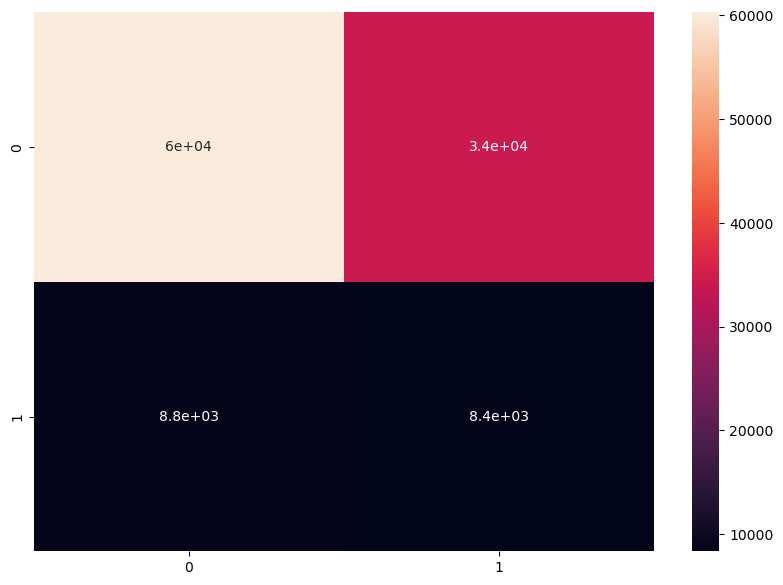

In [318]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')

In [319]:
df

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,3,0,75,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,68,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3,1,68,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,3,0,74,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3,0,84,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [320]:
inp2

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
0,0.07200,0.305556,1.000000,1.0,0.571429,0.620817,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000679,0.000000,1.00000
1,0.00056,0.000000,1.000000,0.0,0.792208,0.804770,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.006794,0.009393,0.00000
2,0.00024,0.000000,1.000000,0.0,0.623377,0.821963,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006988,0.044075,0.00000
3,0.00080,0.000000,0.333333,1.0,0.675325,0.930486,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.003397,0.043353,0.00000
4,0.00056,0.027778,1.000000,0.0,0.597403,0.527639,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.007182,0.004335,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446563,0.02160,0.000000,1.000000,0.0,0.389610,0.019967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.037368,0.009393,0.00000
446564,0.00080,0.000000,1.000000,0.0,0.727273,0.939730,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.029118,0.047688,0.02809
446565,0.07200,0.277778,1.000000,1.0,0.532468,0.402847,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.024750,0.097543,1.00000
446566,0.00072,0.000000,1.000000,0.0,0.753247,0.667406,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.010871,0.012283,0.02809


In [321]:
import pickle

In [322]:
pickle.dump(model,open('hack2.pkl','wb'))
model=pickle.load(open('hack2.pkl','rb'))

In [323]:
df

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,30,0,3,0,75,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,200,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,20,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,40,0,3,0,89,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,0,5,3,0,68,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,4000,3,3,1,68,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,8000,8,3,0,74,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,5000,3,3,0,84,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [324]:
x_test

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
230744,30,0,3,0,82,792,12,12,2,2,2,2,1,2,1,2,2130,350,0.0
27826,70,16,3,0,92,363,12,12,2,1,1,2,1,1,1,2,4660,430,0.0
314625,2000,20,3,1,81,1475,12,12,2,1,1,2,2,1,1,2,20660,6110,0.0
140256,300,0,3,0,68,2250,12,12,2,2,2,2,2,2,1,2,6000,340,0.0
502955,1700,0,3,0,94,3670,12,12,2,2,2,2,2,1,2,2,1780,110,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512790,30,0,3,0,82,4889,12,12,1,2,2,2,2,2,1,2,30,500,0.0
529291,700,0,0,0,78,5379,12,12,2,1,2,1,2,2,1,2,700,90,0.0
215808,400,1,0,0,68,5070,12,12,1,2,2,2,2,1,1,1,1660,480,0.0
389946,400,20,3,0,80,4492,12,12,2,1,2,1,2,2,2,2,530,1270,0.0


In [325]:
df.iloc[230744]

claim                           30
period                           0
phy_stats                        3
RenalDiseaseIndicator            0
age                             82
Provider                       792
NoOfMonths_PartACov             12
NoOfMonths_PartBCov             12
ChronicCond_Alzheimer            2
ChronicCond_KidneyDisease        2
ChronicCond_Cancer               2
ChronicCond_ObstrPulmonary       2
ChronicCond_Depression           1
ChronicCond_Diabetes             2
ChronicCond_IschemicHeart        1
ChronicCond_stroke               2
OPAnnualReimbursementAmt      2130
OPAnnualDeductibleAmt          350
DeductibleAmtPaid              0.0
PotentialFraud                   0
Name: 230744, dtype: object

In [326]:
inp2

,claim,period,phy_stats,RenalDiseaseIndicator,age,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid
0,0.07200,0.305556,1.000000,1.0,0.571429,0.620817,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.000679,0.000000,1.00000
1,0.00056,0.000000,1.000000,0.0,0.792208,0.804770,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.006794,0.009393,0.00000
2,0.00024,0.000000,1.000000,0.0,0.623377,0.821963,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.006988,0.044075,0.00000
3,0.00080,0.000000,0.333333,1.0,0.675325,0.930486,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.003397,0.043353,0.00000
4,0.00056,0.027778,1.000000,0.0,0.597403,0.527639,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.007182,0.004335,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446563,0.02160,0.000000,1.000000,0.0,0.389610,0.019967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.037368,0.009393,0.00000
446564,0.00080,0.000000,1.000000,0.0,0.727273,0.939730,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.029118,0.047688,0.02809
446565,0.07200,0.277778,1.000000,1.0,0.532468,0.402847,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.024750,0.097543,1.00000
446566,0.00072,0.000000,1.000000,0.0,0.753247,0.667406,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.010871,0.012283,0.02809


In [ ]:
df

In [329]:
df3=pd.concat([inp2,],axis=1)

NameError: name 'df3' is not defined

In [1]:
y_test[140256]

NameError: name 'y_test' is not defined